## Question 1a

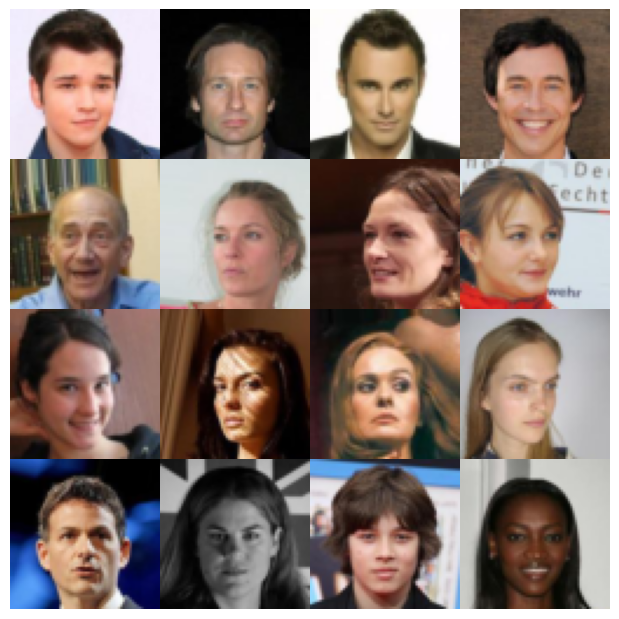

In [2]:
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

root = Path("./data/celeba-subset")
images_dir = root / "train" / "images"

paths = list(images_dir.glob("*.png"))
if not paths:
    paths = list(images_dir.glob("*.jpg"))

sample_paths = random.sample(paths, k=16)

fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for ax, p in zip(axes.ravel(), sample_paths):
    ax.imshow(Image.open(p).convert("RGB"))
    ax.axis("off")

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
out_path = Path("./data_viz_grid.png")
fig.savefig(out_path, dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()

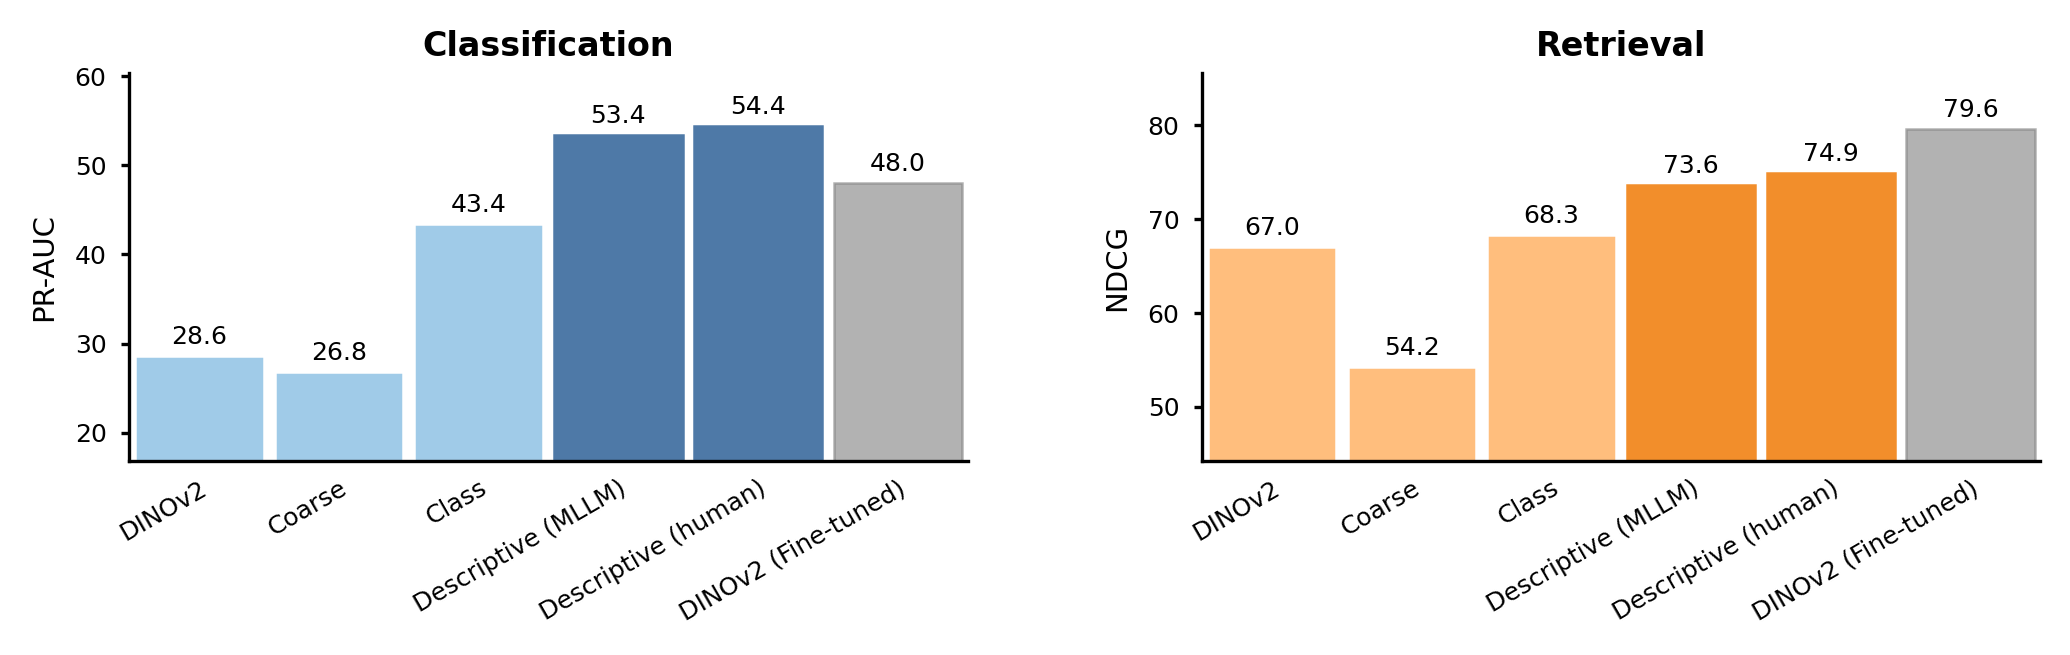

In [2]:
import matplotlib.pyplot as plt
import numpy as np

labels = [
    'DINOv2',
    'Coarse',
    'Class',
    'Descriptive (MLLM)',
    'Descriptive (human)',
    'DINOv2 (Fine-tuned)',
]
class_scores = [28.6, 26.8, 43.4, 53.4, 54.4, 48.0]
retr_scores  = [67.0, 54.2, 68.3, 73.6, 74.9, 79.6]

plt.rcParams.update({
    "font.size": 7,
    "axes.titlesize": 8,
    "axes.labelsize": 7,
    "xtick.labelsize": 6,
    "ytick.labelsize": 6,
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.0, 2.4), dpi=300)

color_cls_base = '#A0CBE8'
color_cls_ours = '#4E79A7'
color_ret_base = '#FFBE7D'
color_ret_ours = '#F28E2B'

# --- Make bars tightly packed by controlling x positions + bar width ---
x = np.arange(len(labels))
bar_w = 0.92  # close to full category width => minimal gap

# --- Graph 1 ---
bars1 = ax1.bar(x, class_scores, width=bar_w, color=color_cls_base,
                edgecolor='white', linewidth=0.6)
bars1[3].set_color(color_cls_ours)
bars1[4].set_color(color_cls_ours)
bars1[5].set_color('gray'); bars1[5].set_alpha(0.6)

ax1.set_title('Classification', pad=4, fontweight='semibold')
ax1.set_ylabel('PR-AUC')
ax1.grid(False)

cls_min = min(class_scores)
ax1.set_ylim(cls_min - 10, max(class_scores) + 6)

for bar in bars1:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., h + 0.8, f'{h:.1f}',
             ha='center', va='bottom', fontsize=6)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(0.8)
ax1.spines['bottom'].set_linewidth(0.8)

ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=30, ha='right', rotation_mode='anchor')

# Remove outer x-margins so bars sit close to edges too
ax1.set_xlim(-0.5, len(labels) - 0.5)

# --- Graph 2 ---
bars2 = ax2.bar(x, retr_scores, width=bar_w, color=color_ret_base,
                edgecolor='white', linewidth=0.6)
bars2[3].set_color(color_ret_ours)
bars2[4].set_color(color_ret_ours)
bars2[5].set_color('gray'); bars2[5].set_alpha(0.6)

ax2.set_title('Retrieval', pad=4, fontweight='semibold')
ax2.set_ylabel('NDCG')
ax2.grid(False)

retr_min = min(retr_scores)
ax2.set_ylim(retr_min - 10, max(retr_scores) + 6)

for bar in bars2:
    h = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., h + 0.8, f'{h:.1f}',
             ha='center', va='bottom', fontsize=6)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(0.8)
ax2.spines['bottom'].set_linewidth(0.8)

ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=30, ha='right', rotation_mode='anchor')
ax2.set_xlim(-0.5, len(labels) - 0.5)

for ax in (ax1, ax2):
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=2, width=0.8)

fig.subplots_adjust(wspace=0.28, left=0.08, right=0.99, top=0.86, bottom=0.32)
plt.show()
